## Final Project Submission

Please fill out:
* Student name: Ochieng Calvince Mbara
* Student pace: self paced / part time / full time: Full time
* Scheduled project review date/time: 30/09/2022
* Instructor name: William Okomba
* Blog post URL:


## Business understanding

## Business overview
A Real Estate Agency is project management body tasked with giving advices to homeowners
on when they can buy or sell homes. They also cite the relevancy to why it should be so. 

# objectives
We are therefore intrested in knowing how house renovation would help homeowners to be able to predict the current and future 
prices of their houses so that they be aware of what best time they can buy or sell the houses.

In addition, we want to be able to offer a constructive advice to the stakeholders about the current and future prices of the houses by building or creating a model that will predict the price of these houses.This models will help in coming up with a plan on when it is appropriate to buy or sell.

We also want to come up with an analysis so that we know how factors like location, bathrooms and the condition of the houses can be of what influence to the estimated value of the houses and by what amount. This will assist in knowing where to put more strenght so as to achieve the rationale of this project.

## importing dependencies

In [1]:
# importing neccessary libraries
#For numerical oerations
import numpy as np
# For loading data ,data analysis and data cleaning
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings ('ignore')

# Data loading

The dataset is from kc_house_data.csv

In [2]:
houses_df = pd.read_csv("data/kc_house_data.csv")

## Data understanding

1. having a look at the dataframe overview
2. checking for the shape of the dataframe
3. checking the columns of the dataframe
4. checking if the rows are duplicated in the dataframe 
5. checking for null values in the dataframe

In [3]:
#dataset overview
houses_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#dataset overview
houses_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
# shape of the dataframe
houses_df.shape

(21597, 21)

In [6]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#checking  the columns in the dataset
houses_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#descriptive statistics of the dataset
houses_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
#checking for unique values in each column
houses_df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [10]:
#checking for null values in the dataset
houses_df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Observations


1. The dataset is in form of a csv file
2. The dataframe has a total of 21597 rows and 21 columns
3. The dataframe has 6 object, 6 float, 9 int64
4. yr_renovated, waterfront,and view has null values 

# Data Preparation

# a) Univariate Analysis

## Data cleaning

* drop rows with null values
* checking for duplicates and missing values
* checking for outliers

In [11]:
missing_data_check = houses_df.isnull().sum().sort_values(ascending = False)
missing_data_check

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64

## Observations
* "waterfront", "view", "yr_renovated" contains null values

In [12]:
#checking for duplicates
row,col = houses_df.shape
houses_df.drop_duplicates(inplace = True)

if houses_df.shape==(row,col):
    print('The dataset doesnt\'t have any duplicates')
else:
    print('The dataset have duplicates')

The dataset doesnt't have any duplicates


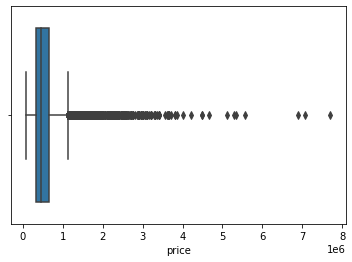

In [13]:
#box plot showing outliers on the price column
sns.boxplot(x=houses_df['price']);

In [14]:
#checking for outliers
def outlier(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
    return outliers
# Checking the number of outliers in the 'price' column
print("Count of outliers:",outlier(houses_df.price).count())

Count of outliers: 1158


## Observation

* The dataset has no duplicates

# b) Bivariate

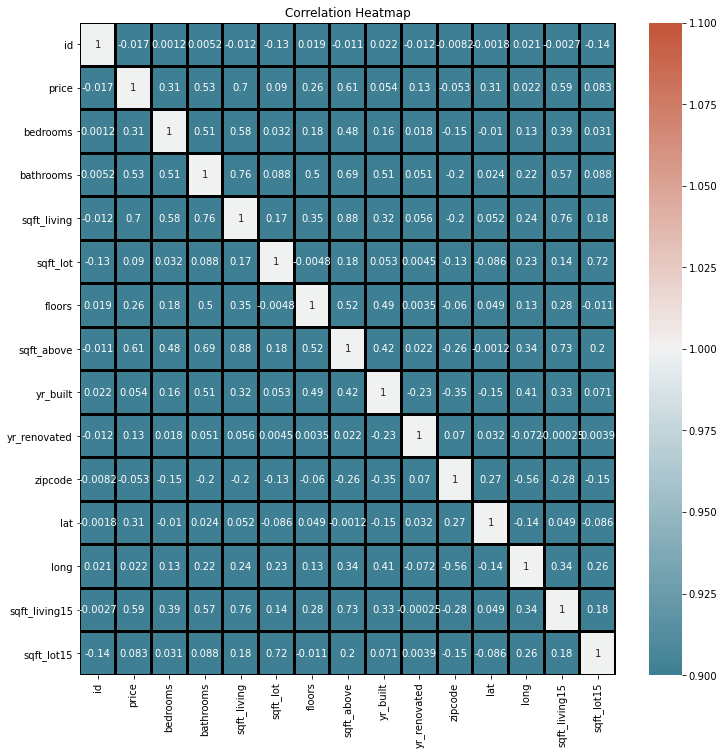

In [15]:
#A heatmap showing correlation between different column pairs
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(houses_df.corr(),vmin=1,vmax=1,annot=True,cmap=cmap,linewidths=2,linecolor='black')
heatmap.set_title('Correlation Heatmap');

 ## Exploring 'price' column

1. Explore the price column using heatmap
2. Compute the correlation coefficient for price column with other columns

In [16]:
#descriptive statistics summary of the dataset
summary_statistics = houses_df.price.describe()
print("count:",summary_statistics[1])
print("Mean of the price:",summary_statistics[1])
print("Standard deviation of mean:",summary_statistics[2])
print("Minimum value for price:",summary_statistics[3])
print("Lower quantile for price:",summary_statistics[4])
print("median for price:",summary_statistics[5])
print("Upper quantile for the price:",summary_statistics[6])
print("Maximum value for the price:",summary_statistics[7])

count: 540296.5735055795
Mean of the price: 540296.5735055795
Standard deviation of mean: 367368.1401013945
Minimum value for price: 78000.0
Lower quantile for price: 322000.0
median for price: 450000.0
Upper quantile for the price: 645000.0
Maximum value for the price: 7700000.0


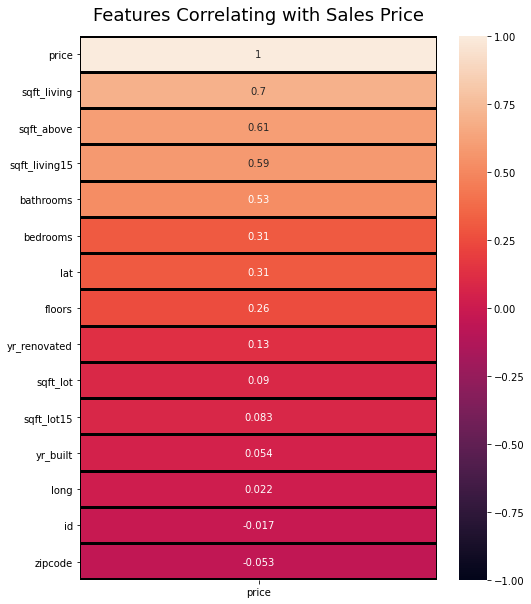

In [17]:
#heatmap showing the correaltion of price column with the independent variables
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(
    houses_df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## Observation

THere is a high correlation between bathrooms and price column 

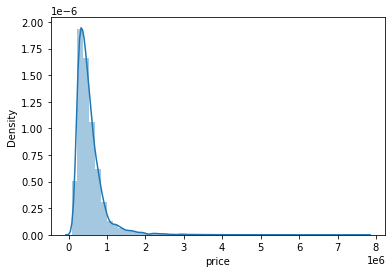

In [18]:
# checking the distribution of price column
sns.distplot(houses_df['price']);

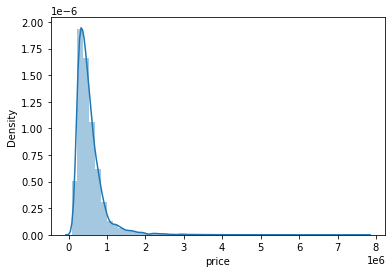

In [19]:
# checking the distribution of price column
sns.distplot(houses_df['price']);

## Observations from the distribution for price column
1. The plot shows the price column is positively skewed 
2. from our plotting is is evident that our data is not normally distributed
3. It also displays a leptokurtic kurtosis

## Linear regression asumptions
a) Linearity

In [20]:
# to show the most correlated columns with price columns
PriceCorr = houses_df.corr()['price']
filteredcorr = PriceCorr[((PriceCorr >= .5) | (PriceCorr <= -.5)) & (PriceCorr !=1.000)].sort_values(ascending = False)
filteredcorr

sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
Name: price, dtype: float64

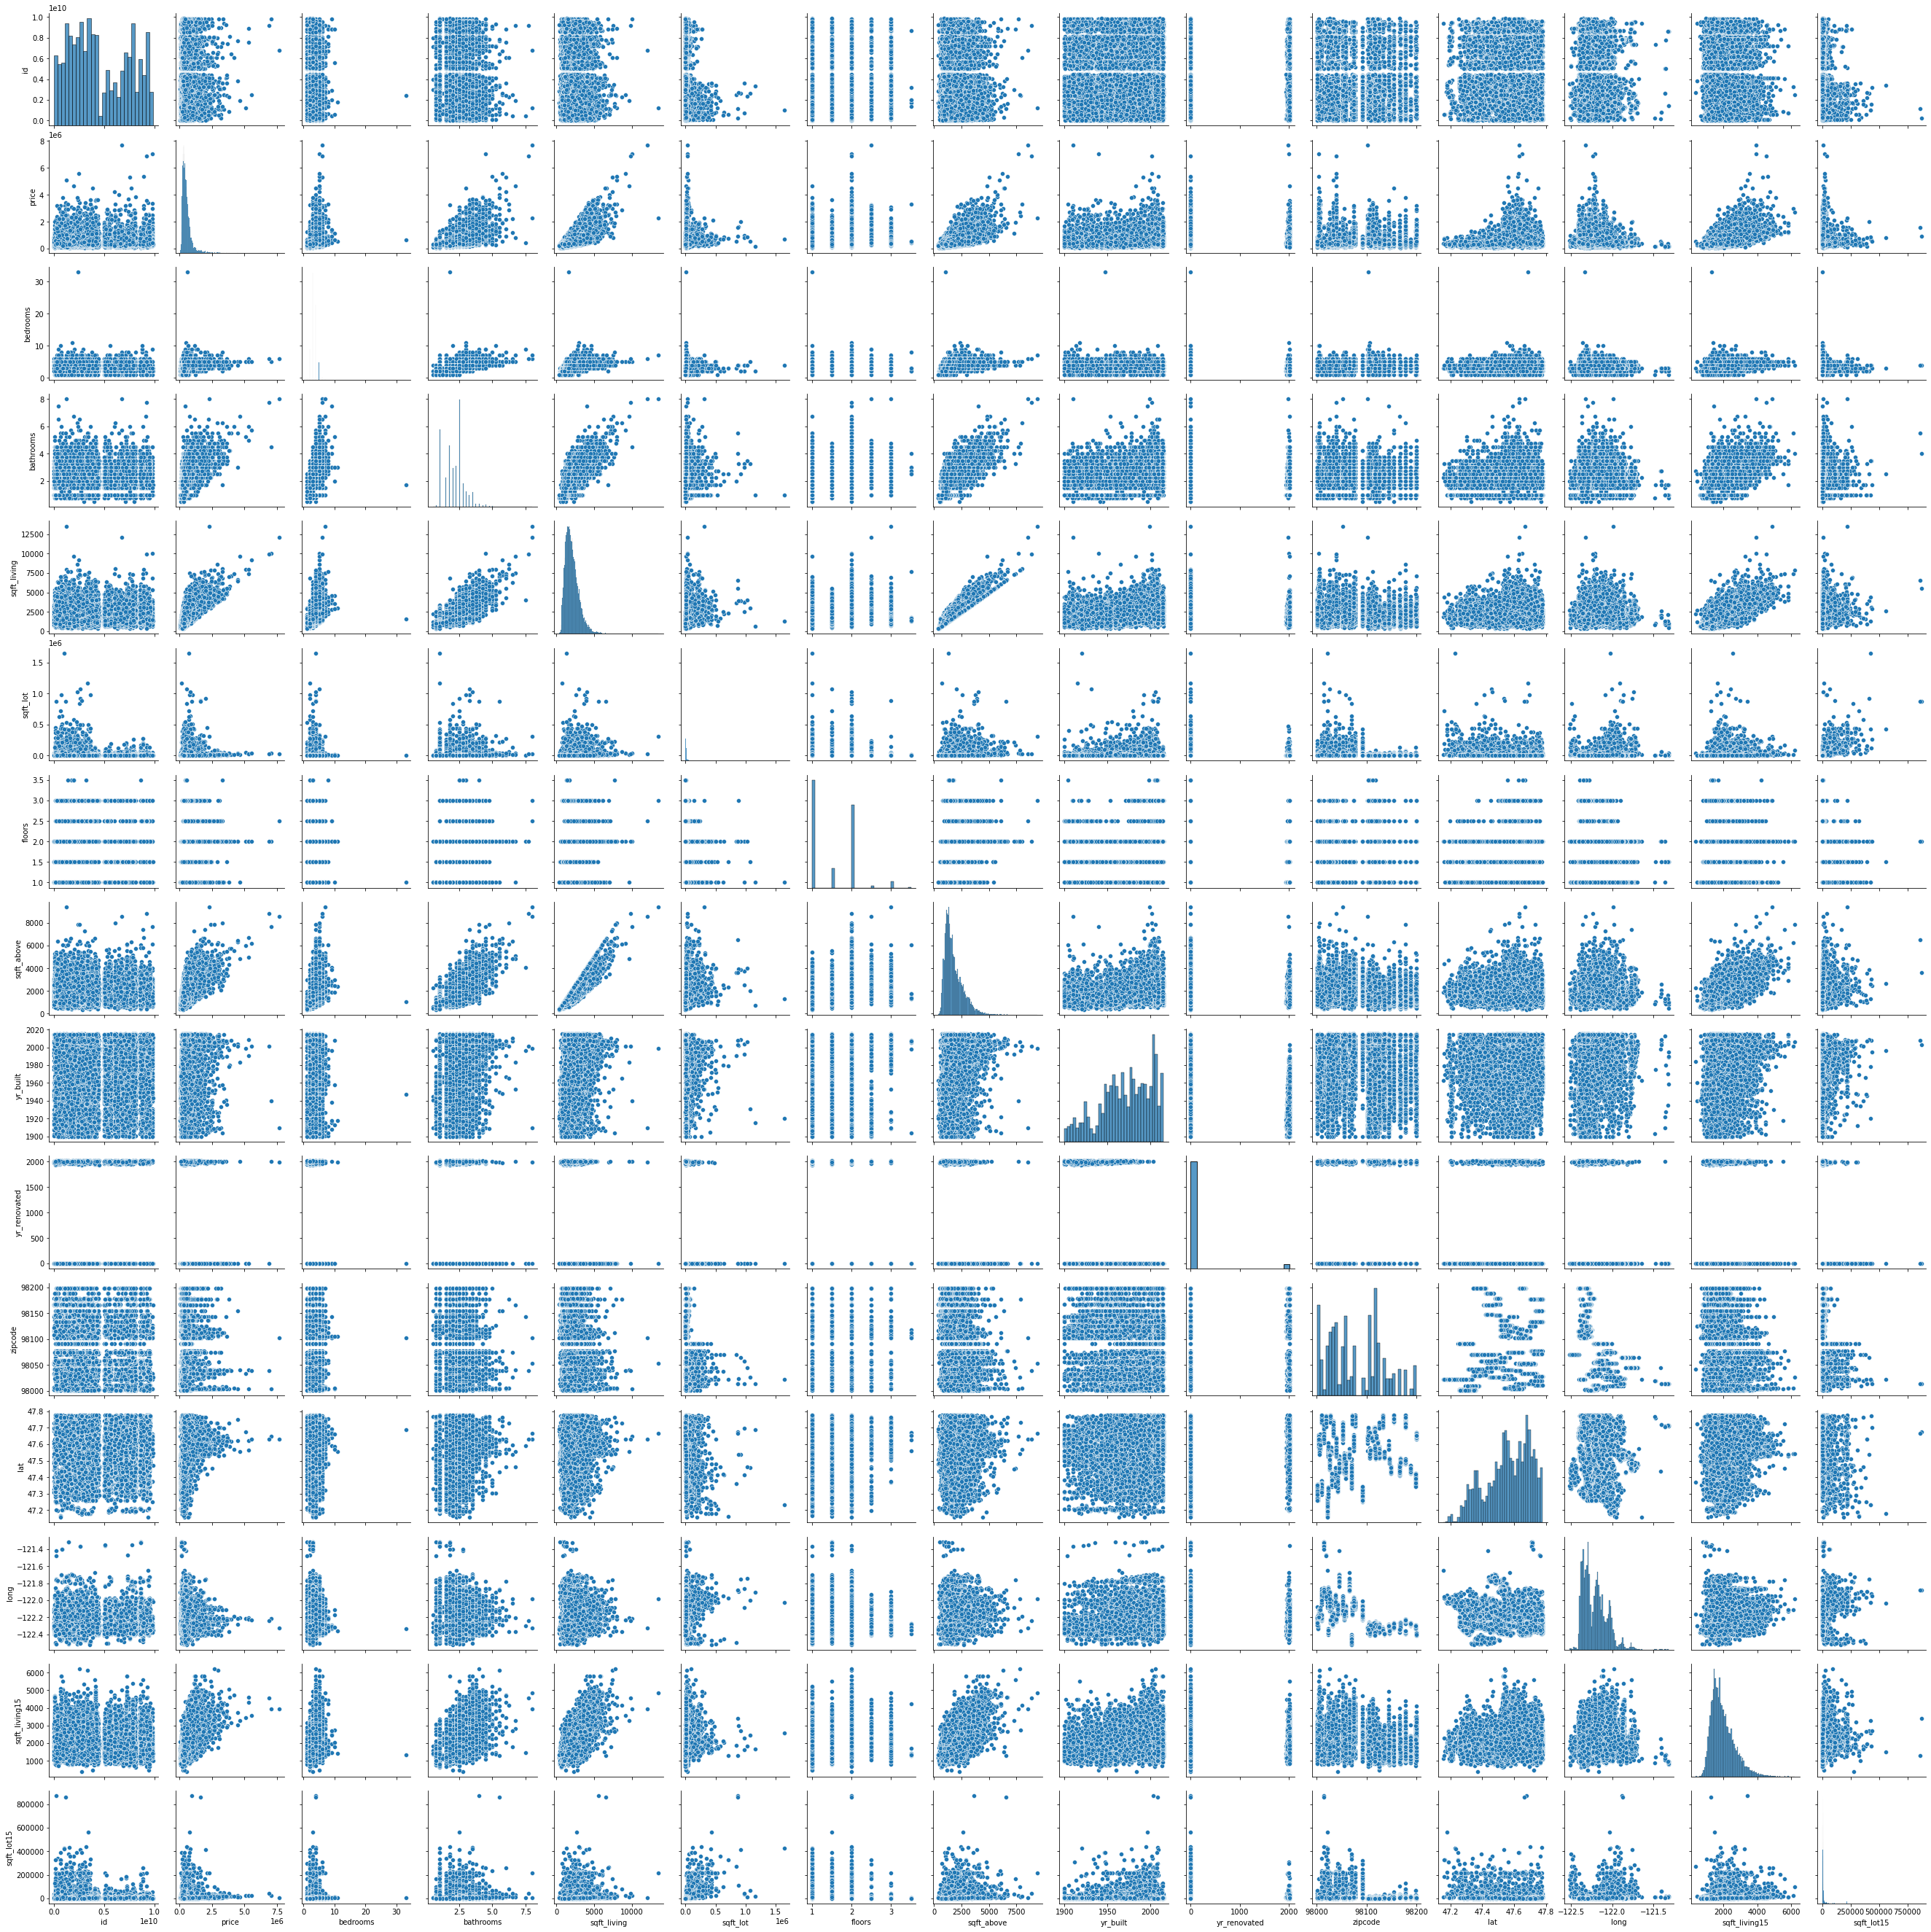

In [21]:
# Pairplot to show linearity between the variables
sns.pairplot(houses_df);

## Relatioship with categorical data

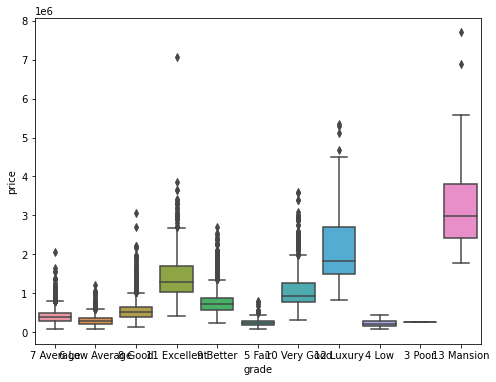

In [22]:
var = 'grade'
data = pd.concat([houses_df['price'], houses_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data);

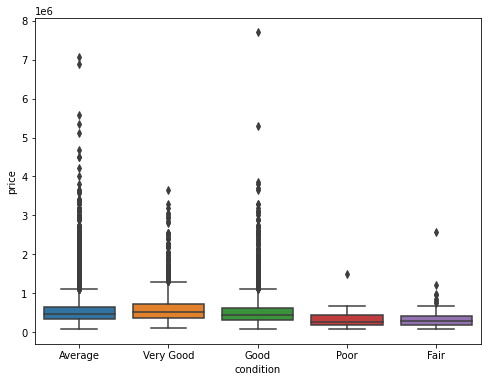

In [23]:
var = 'condition'
data = pd.concat([houses_df['price'], houses_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data);

## Observations
1. Grade and price are not related.
2. There is a stronger relationship between 'price' and 'condition' where prices decrease with the condition of the house

## Relatioship with numerical data

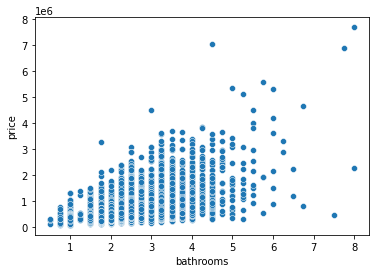

In [24]:
#scatter plot between price and bathroom
bathrooms = houses_df["bathrooms"]
price = houses_df["price"]
sns.scatterplot(data = houses_df,x = bathrooms,y = price);

# Observation
1. bathrooms' seem to be linearly related with 'price' column. This relationship is positive which means that an increase in the numbers of bathrooms leads to an increase in price

# b) Normality

* Density plots showing distribution in columns

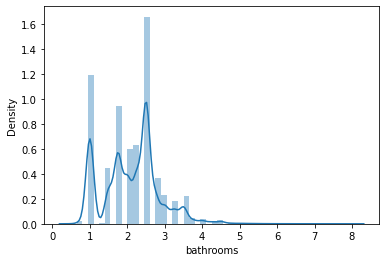

<Figure size 432x288 with 0 Axes>

In [25]:
#distribution for bathrooms
sns.distplot(houses_df['bathrooms'])
fig = plt.figure();

In [26]:
#skewness and kurtosis
print("Skewness: %f" % houses_df['bathrooms'].skew())
print("Kurtosis: %f" % houses_df['bathrooms'].kurt())

Skewness: 0.519709
Kurtosis: 1.279315


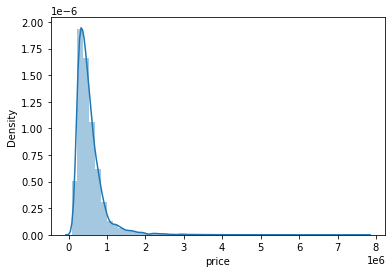

In [27]:
sns.distplot(houses_df['price']);

In [28]:
#skewness and kurtosis
print("Skewness: %f" % houses_df['price'].skew())
print("Kurtosis: %f" % houses_df['price'].kurt())

Skewness: 4.023365
Kurtosis: 34.541359


# simple linear regression


  for this model we going to use bathrooms as our independent variable and price as the dependent variable

  Determining x and y variables

In [29]:
# independent variable

X_baseline = houses_df['bathrooms']

# dependent variable

y = houses_df['price']

In [30]:
count = 0
bath_outliers = []
mean = np.mean(houses_df['bathrooms'])
max_distance = np.std(houses_df['bathrooms']) * 3
for idx, row in houses_df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        houses_df.drop(idx, inplace=True)
count

187

  Creating the model

In [31]:
# Creating a simple linear regression model

model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))  # Ordinary Least Squares 

results = model.fit()  

In [32]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:42:54   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
results.params

const          8712.651753
bathrooms    251241.762495
dtype: float64

In [34]:
print(results.conf_int())

                       0              1
const       -3488.355556   20913.659062
bathrooms  245822.052022  256661.472969


# Model summary

1.  The model is statistically significant having F-statistic p-value below the alpha,given that the alpha is 0.05.
2.  The model explains about 28% of the variance in price.
3.  The model coefficients (const and bathrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
4.  


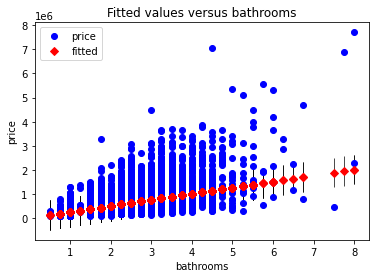

In [35]:
# Visualizing our plot fit model
sm.graphics.plot_fit(results, "bathrooms")
plt.show()

ValueError: x and y must be the same size

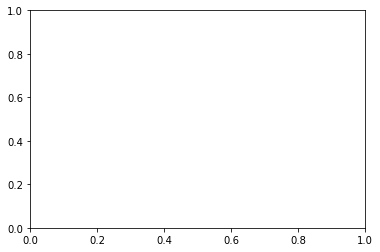

In [36]:
#visualizing the distribution for residuals
fig, ax = plt.subplots()
ax.scatter(houses_df.price, results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("bathrooms")
ax.set_ylabel("residuals");


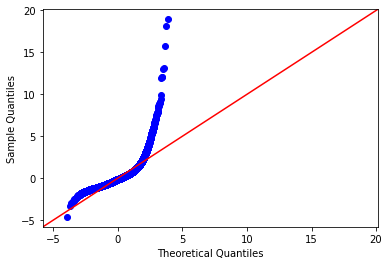

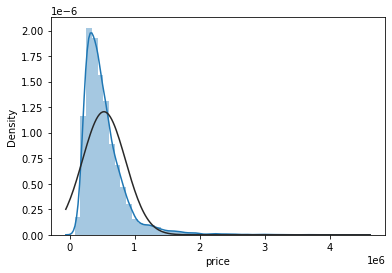

In [37]:
from scipy.stats import norm
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit = True)
plt.show()
sns.distplot(houses_df.price, fit=norm);

In [38]:
#apply log transformation
houses_df.log_price = np.log(houses_df.price)

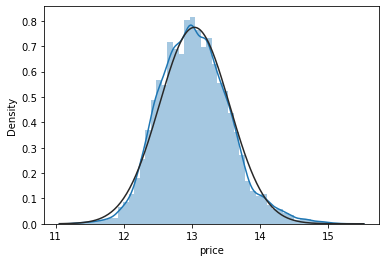

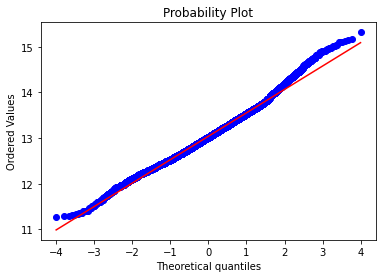

In [39]:
#transformed histogram and normal probability plot
sns.distplot(houses_df.log_price, fit=norm);
fig = plt.figure()
r = stats.probplot(houses_df.log_price, plot=plt)

## Adding another independent variable

In [40]:
# Adding another independent variable
x_second = houses_df[['bedrooms', "bathrooms"]]
x_second

,bedrooms,bathrooms
0,3,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00
...,...,...
21592,3,2.50
21593,4,2.50
21594,2,0.75
21595,3,2.50


In [43]:
second_model = sm.OLS(endog = y, exog = sm.add_constant(x_second))
second_results = second_model.fit()
print(second_results.summary())

ValueError: The indices for endog and exog are not aligned

In [42]:
sm.graphics.plot_fit(second_results,"bedrooms")
plt.show();

NameError: name 'second_results' is not defined

In [ ]:
sm.graphics.plot_fit(second_results,"bathrooms")
plt.show();

In [ ]:
#partial regression plot
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=["bathrooms", "bedrooms"], fig=fig)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)

bedrooms_ax = axes[0]
bedrooms_ax.scatter(houses_df["bedrooms"], second_results.resid)
bedrooms_ax.axhline(y=0, color="black")
bedrooms_ax.set_xlabel("bedrooms")
bedrooms_ax.set_ylabel("residuals")

bathrooms_ax = axes[1]
bathrooms_ax.scatter(houses_df["bathrooms"], second_results.resid)
bathrooms_ax.axhline(y=0, color="black")
bathrooms_ax.set_xlabel("bathrooms");

In [ ]:
x_all = houses_df.drop('price', axis=1).select_dtypes('number')
x_all

In [ ]:
third_model = sm.OLS(y, sm.add_constant(x_all))
third_results = third_model.fit()
print(third_results.summary())